In [37]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings
warnings.simplefilter("ignore", category=Warning)

palette_changing_states = sns.color_palette("RdYlGn", 51)
palette_changing_top10 = sns.color_palette("RdYlGn", 10)

In [38]:
#read in the data
dataset = pd.read_csv('gun_incidents_usa.csv')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)
dataset

,incident_id,state,city,address,n_killed,n_injured
date,,,,,,
2022-05-28,2314858,Arkansas,Little Rock,W 9th St and Broadway St,0,1
2022-05-28,2314409,Colorado,Denver,3300 block of Clay St,0,1
2022-05-28,2314498,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
2022-05-28,2314485,South Carolina,Florence,Old River Rd,0,2
2022-05-28,2314483,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...
2013-01-07,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
2013-01-05,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308490 entries, 2022-05-28 to 2013-01-01
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   incident_id  308490 non-null  int64 
 1   state        308490 non-null  object
 2   city         308490 non-null  object
 3   address      308490 non-null  object
 4   n_killed     308490 non-null  int64 
 5   n_injured    308490 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 16.5+ MB


In [40]:
dataset.describe(include='all')

,incident_id,state,city,address,n_killed,n_injured
count,3.084900e+05,308490,308490,308490,308490.000000,308490.000000
unique,NaN,51,12066,271648,NaN,NaN
top,NaN,Illinois,Chicago,Main St,NaN,NaN
freq,NaN,28535,21723,53,NaN,NaN
mean,1.220078e+06,NaN,NaN,NaN,0.429502,0.835865
std,6.657274e+05,NaN,NaN,NaN,0.608197,0.796537
min,9.211400e+04,NaN,NaN,NaN,0.000000,0.000000
25%,6.238530e+05,NaN,NaN,NaN,0.000000,0.000000
50%,1.220908e+06,NaN,NaN,NaN,0.000000,1.000000
75%,1.819442e+06,NaN,NaN,NaN,1.000000,1.000000


**1. What's the mean time between shootings by state?**

In [41]:
dataset_for_mean = dataset.reset_index().groupby('state')['date'].apply(lambda x: x.sort_values().diff().mean()).reset_index()

dataset_for_mean.rename(columns={'date': 'mean_time_between_shootings'}, inplace=True)
dataset_for_mean.sort_values(by='mean_time_between_shootings', inplace=True)
#reverse the order
dataset_for_mean['mean_time_between_shootings_h'] = dataset_for_mean['mean_time_between_shootings'].dt.seconds / 3600
dataset_for_mean['mean_time_between_shootings'] = dataset_for_mean['mean_time_between_shootings'].dt.days
dataset_for_mean['mean_time_between_shootings_final'] = dataset_for_mean['mean_time_between_shootings']*24 + dataset_for_mean['mean_time_between_shootings_h']
dataset_for_mean

,state,mean_time_between_shootings,mean_time_between_shootings_h,mean_time_between_shootings_final
13,Illinois,0,2.857222,2.857222
43,Texas,0,3.745833,3.745833
4,California,0,3.841389,3.841389
9,Florida,0,4.915833,4.915833
38,Pennsylvania,0,5.154167,5.154167
35,Ohio,0,5.802500,5.802500
32,New York,0,6.376667,6.376667
33,North Carolina,0,7.300000,7.300000
18,Louisiana,0,7.358333,7.358333
10,Georgia,0,7.579167,7.579167


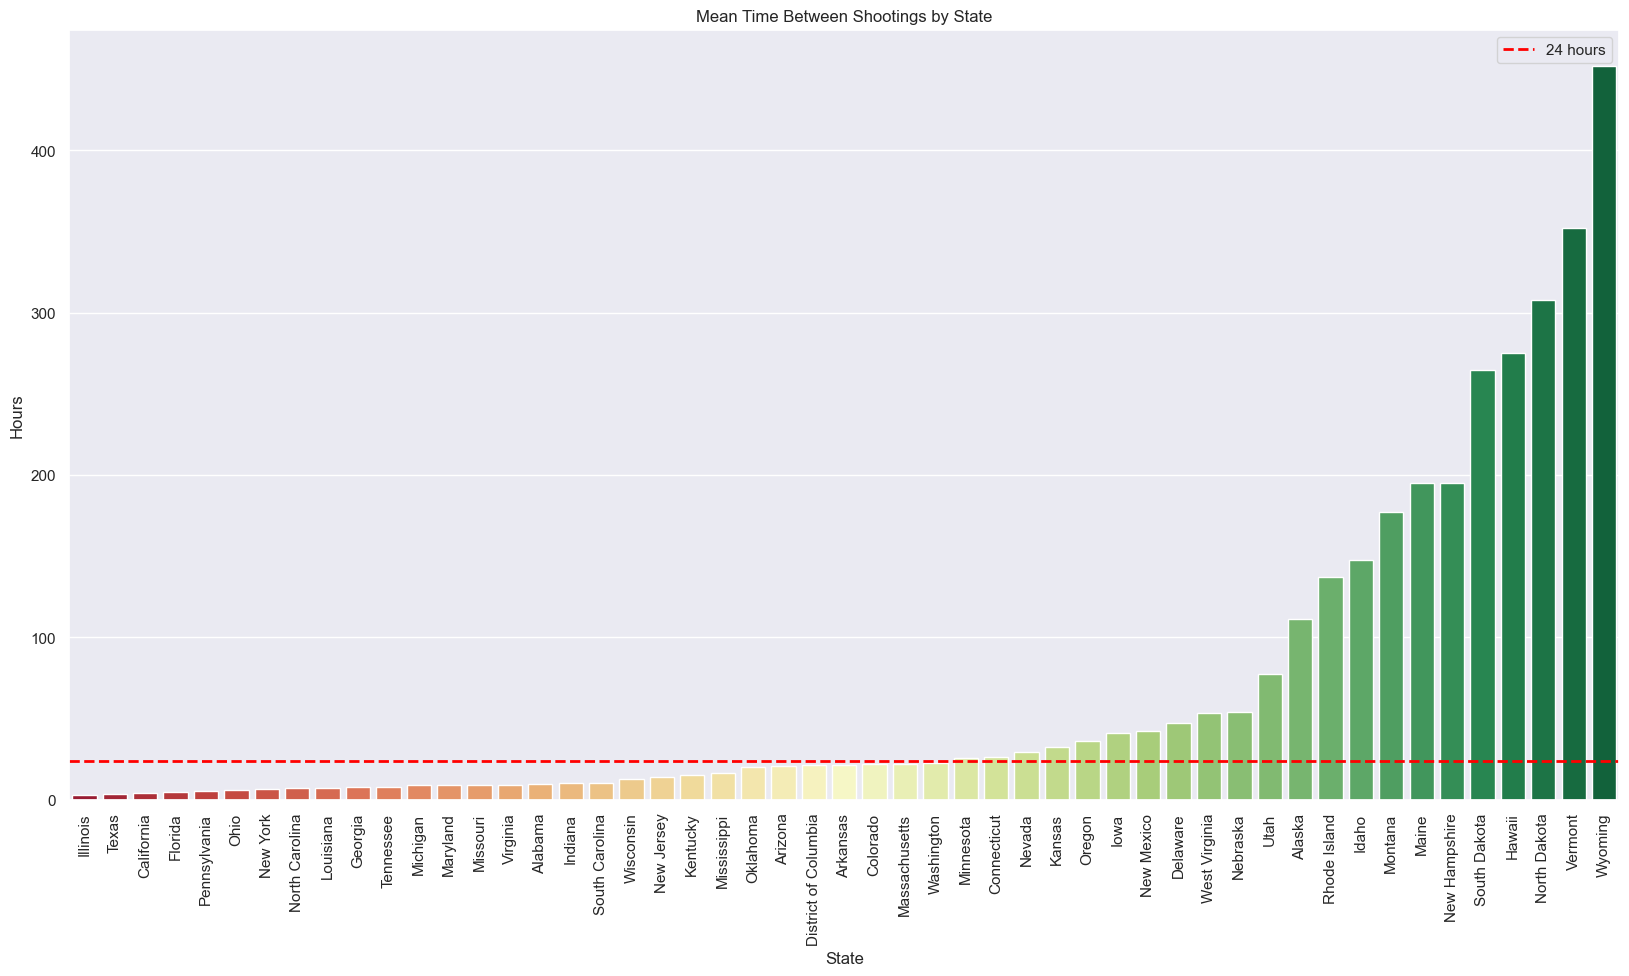

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='state', y='mean_time_between_shootings_final', data=dataset_for_mean, palette=palette_changing_states)
plt.xticks(rotation=90)
plt.title('Mean Time Between Shootings by State')
plt.xlabel('State')
plt.ylabel('Hours')

# Add a horizontal line at y=24
plt.axhline(y=24, color='red', linestyle='--', linewidth=2, label='24 hours')
plt.legend()  
plt.show()

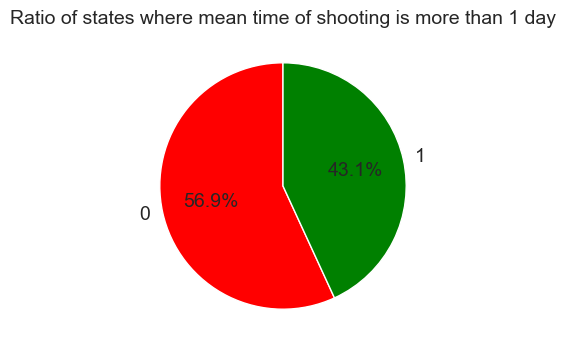

In [43]:
#adding a plot to display proportion of states where mean time between shooting is less than a day
dataset_for_mean['more_than_day'] = np.where(dataset_for_mean['mean_time_between_shootings'] > 0, 1, 0)
value_counts = dataset_for_mean['more_than_day'].value_counts()
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, colors = ['red', 'green'])
ax.set_title('Ratio of states where mean time of shooting is more than 1 day', fontsize=14)
plt.show()

**2. Present a weekly time-series visualization for that state.**

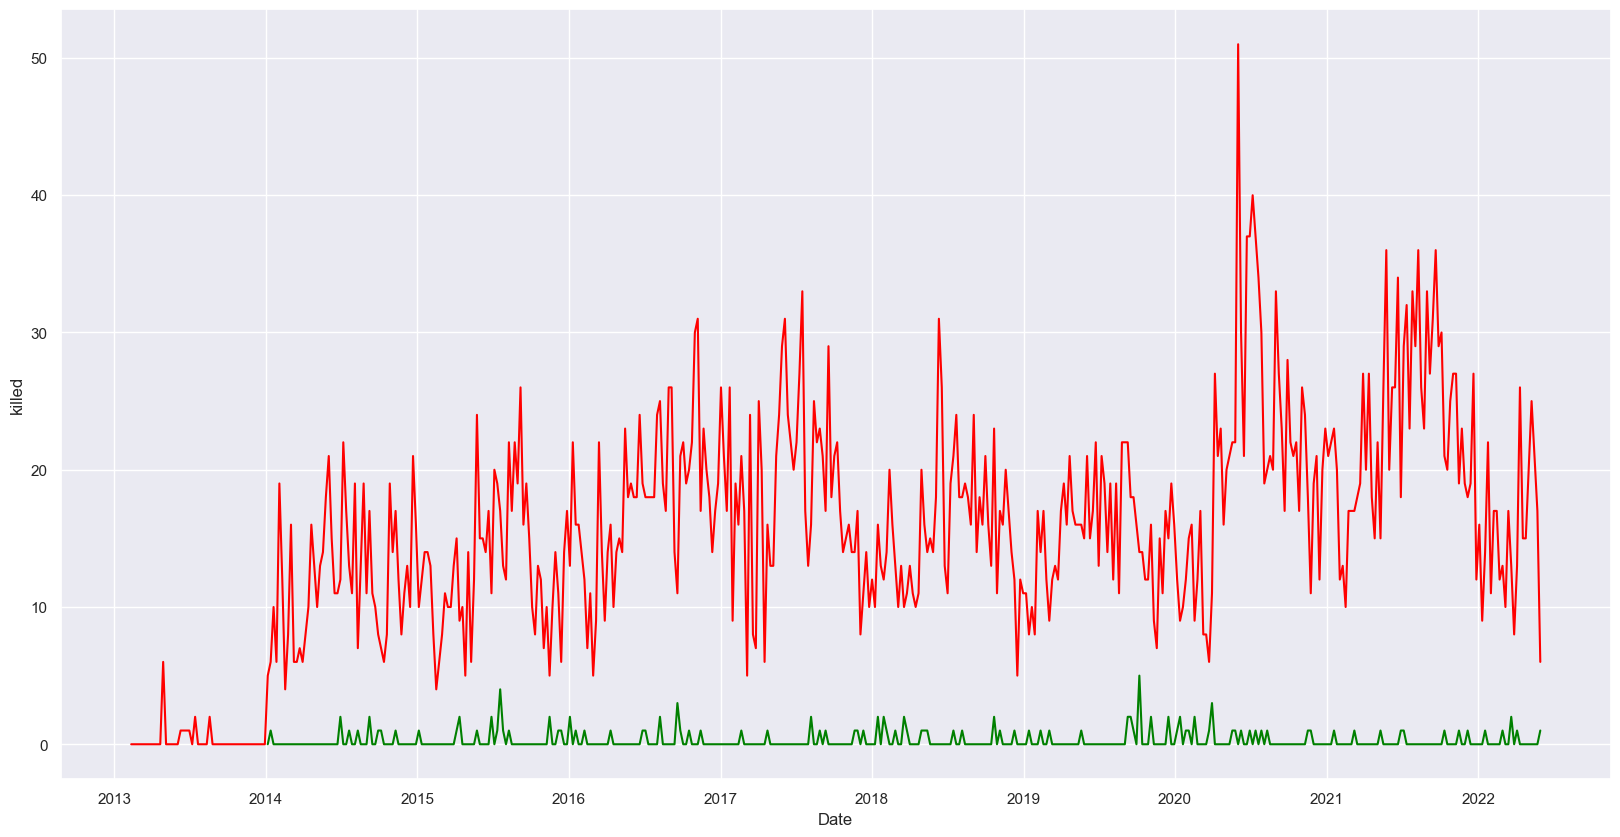

In [44]:
#Ploting a weekly time-series visualization for Illinois and Wyoming

data_for_ill = dataset[dataset['state'] == 'Illinois']
data_for_wy = dataset[dataset['state'] == 'Wyoming']
#sum the number of n_killed by week
data_for_ill = data_for_ill.resample('W-Mon').sum()
data_for_wy = data_for_wy.resample('W-Mon').sum()

#plot for the state 
plt.figure(figsize=(20, 10))
plt.plot(data_for_ill.index, data_for_ill['n_killed'], color='red')
plt.plot(data_for_wy.index, data_for_wy['n_killed'], color='green')
plt.xlabel('Date')
plt.ylabel('killed')
plt.show()

conclusion: It is likely that data is missing from 2013 to 2014.

**3. Identify seasonal and trend components while drawing some conclusions.**

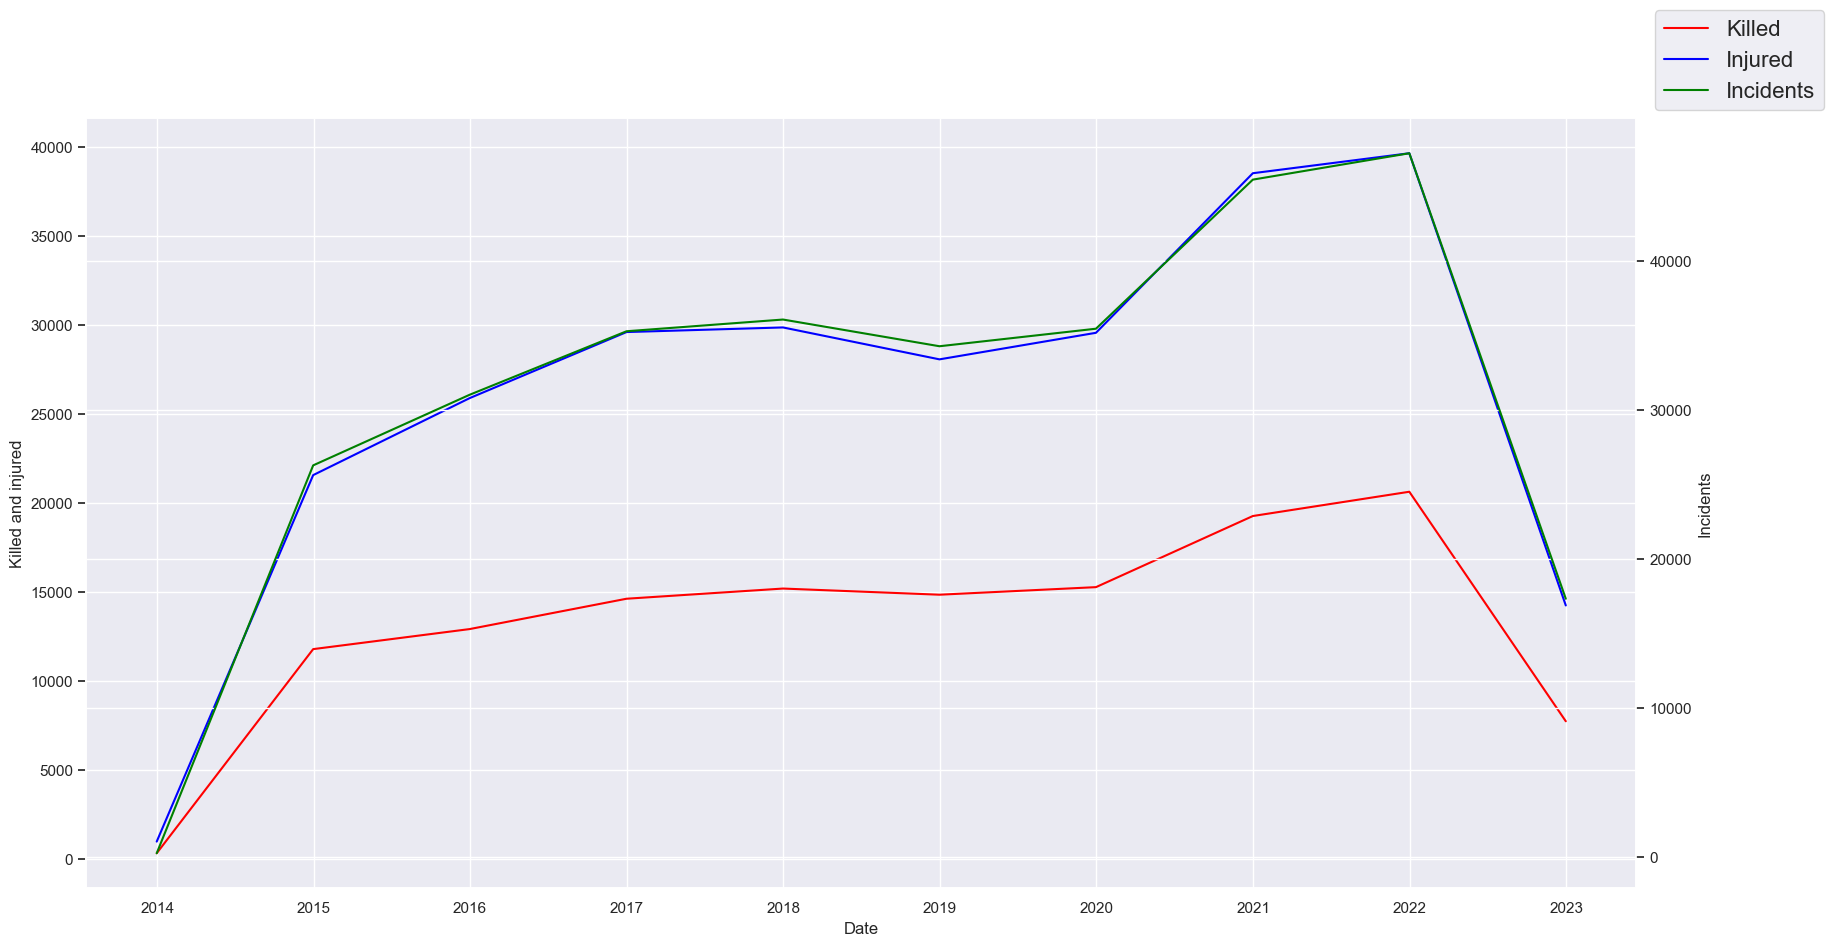

In [45]:
#plot for the number of killed and injured by year
data_yearly = dataset.resample('Y').agg({'n_killed': 'sum',
                                         'n_injured': 'sum',
                                         'incident_id': 'count'})

data_yearly.rename(columns={'incident_id': 'count_incidents'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(data_yearly.index, data_yearly['n_killed'], color='red')
ax1.plot(data_yearly.index, data_yearly['n_injured'], color='blue')
ax2.plot(data_yearly.index, data_yearly['count_incidents'], color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Killed and injured')
ax2.set_ylabel('Incidents')
fig.legend(['Killed', 'Injured', 'Incidents'], fontsize=16)
plt.show()

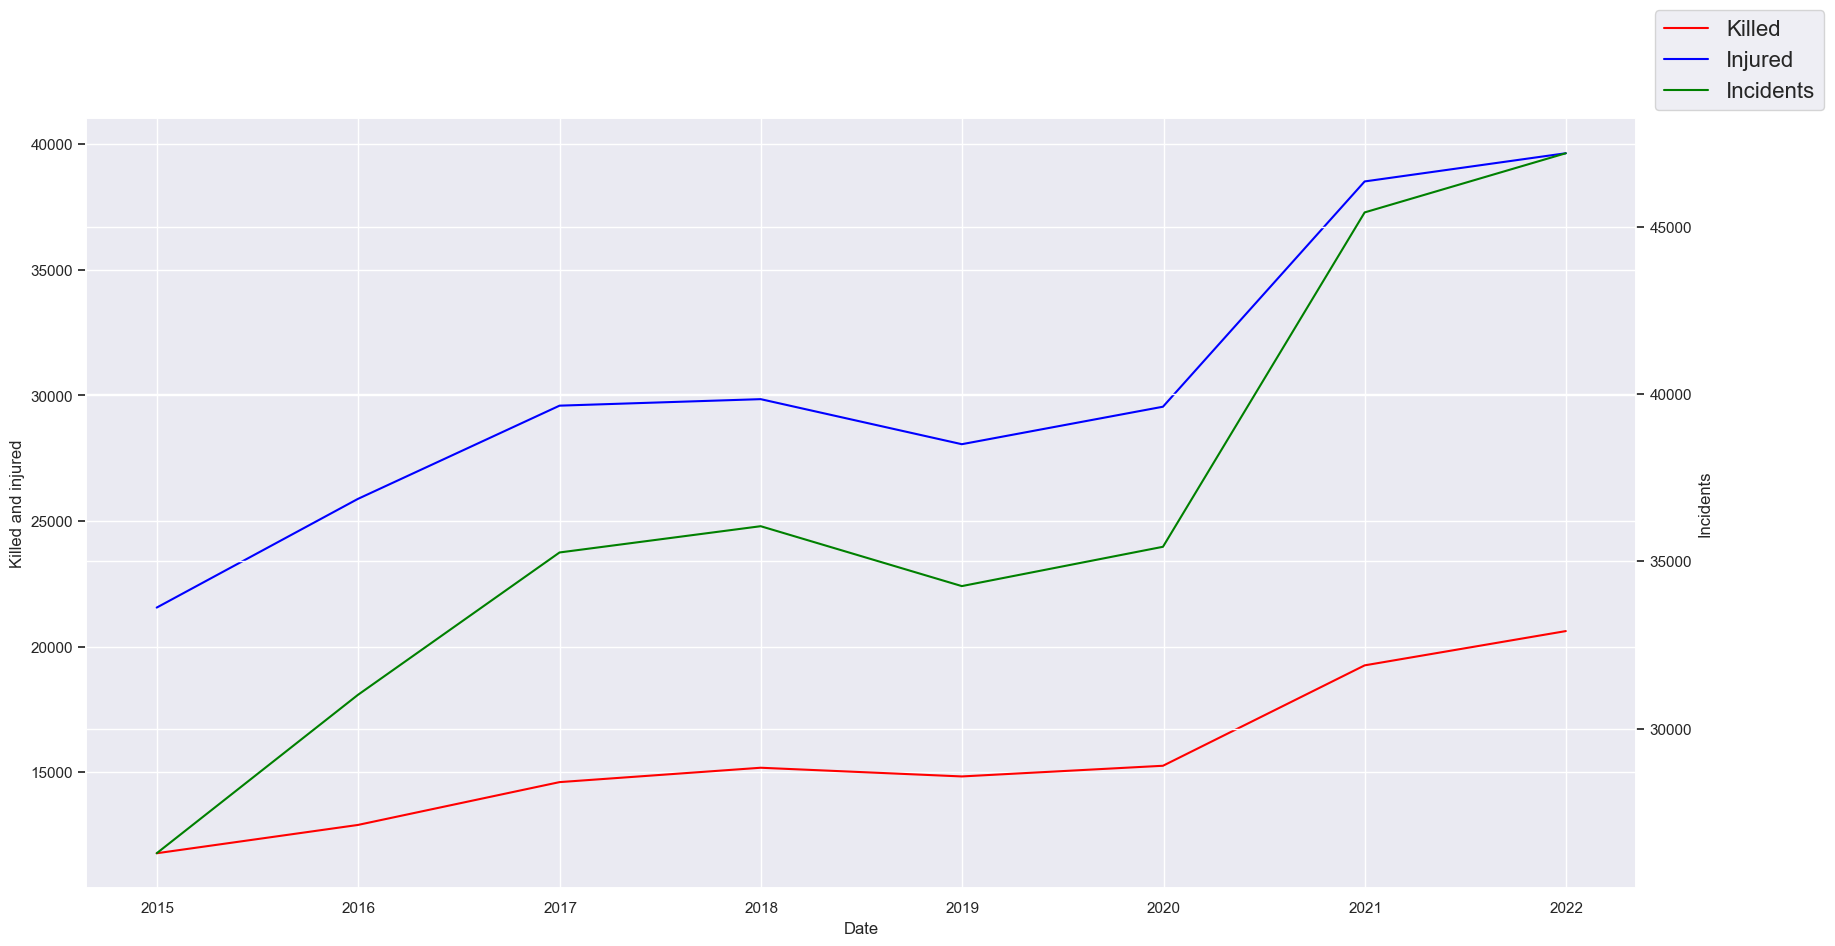

In [46]:
#Hence the first and last year are not complete, drop them
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(data_yearly.index[1:-1], data_yearly['n_killed'][1:-1], color='red')
ax1.plot(data_yearly.index[1:-1], data_yearly['n_injured'][1:-1], color='blue')
ax2.plot(data_yearly.index[1:-1], data_yearly['count_incidents'][1:-1], color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Killed and injured')
ax2.set_ylabel('Incidents')
fig.legend(['Killed', 'Injured', 'Incidents'], fontsize=16)
plt.show()

conclusion: The number of incidents is increasing over time.

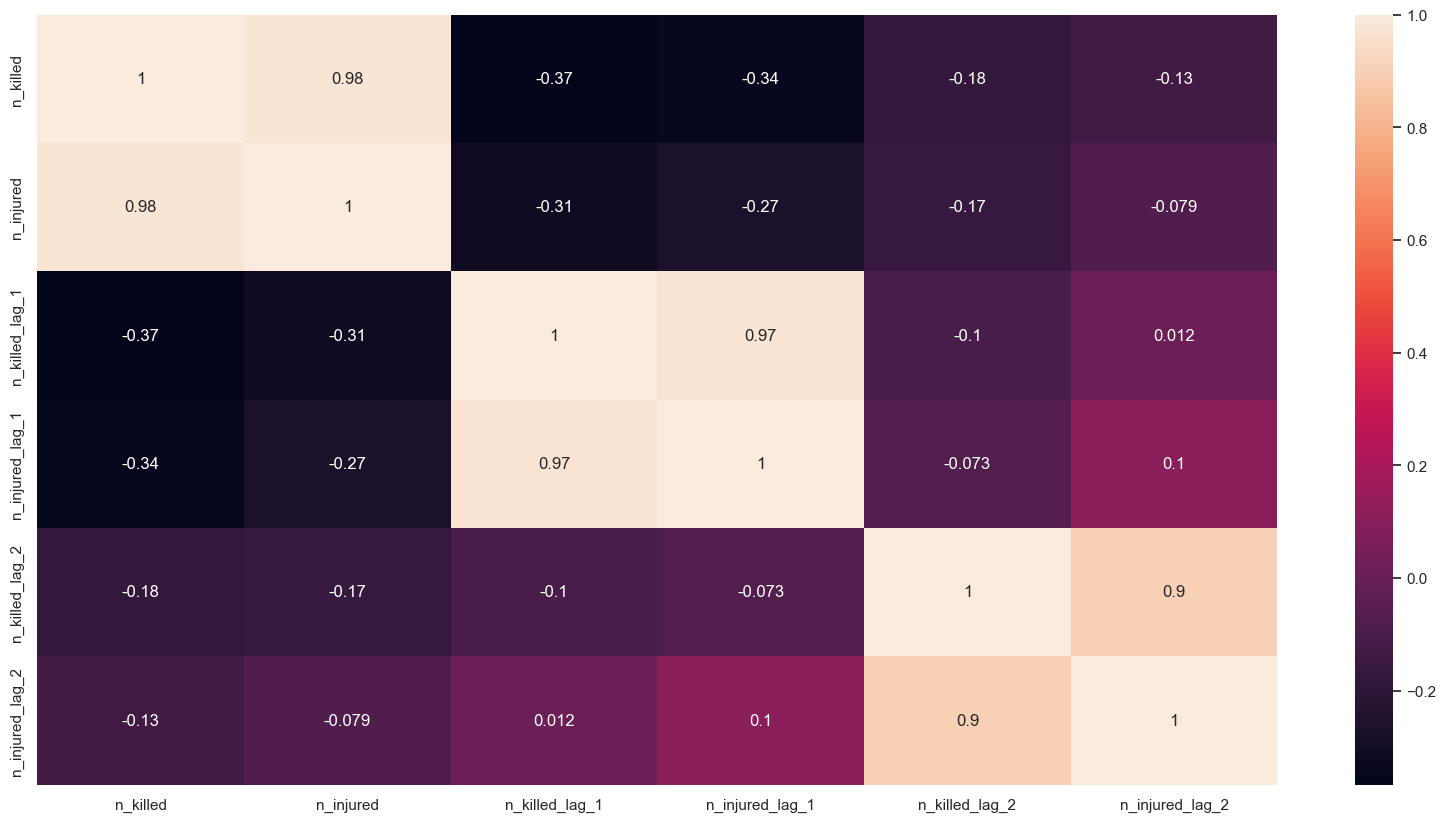

In [49]:
#create a corr matrix between the columns
correlation_matrix = data_quarterly.corr()
#plot the correlation matrix
sns.set(style='whitegrid', palette='Dark2')
plt.figure(figsize=(20, 10))
#plot a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

conclusion: There is a strong correlation between the number of killed and injured in the same quarter and the number of killed and injured in the same quarter of the previous year.

**4. Is there any correlation between the number of persons killed or injured and the number of incidents?**

In [47]:
dataset_stripped = dataset[(dataset.index.year != 2013) & (dataset.index.year != 2021)]
data_quarterly = dataset_stripped.resample('Q').agg({'n_killed': 'sum',
                                                     'n_injured': 'sum'})
#creating a lagged column lag by one year
data_quarterly['n_killed_lag_1'] = data_quarterly['n_killed'].shift(4)
data_quarterly['n_injured_lag_1'] = data_quarterly['n_injured'].shift(4)
#creating an other lagged column lag by one more year
data_quarterly['n_killed_lag_2'] = data_quarterly['n_killed'].shift(8)
data_quarterly['n_injured_lag_2'] = data_quarterly['n_injured'].shift(8)



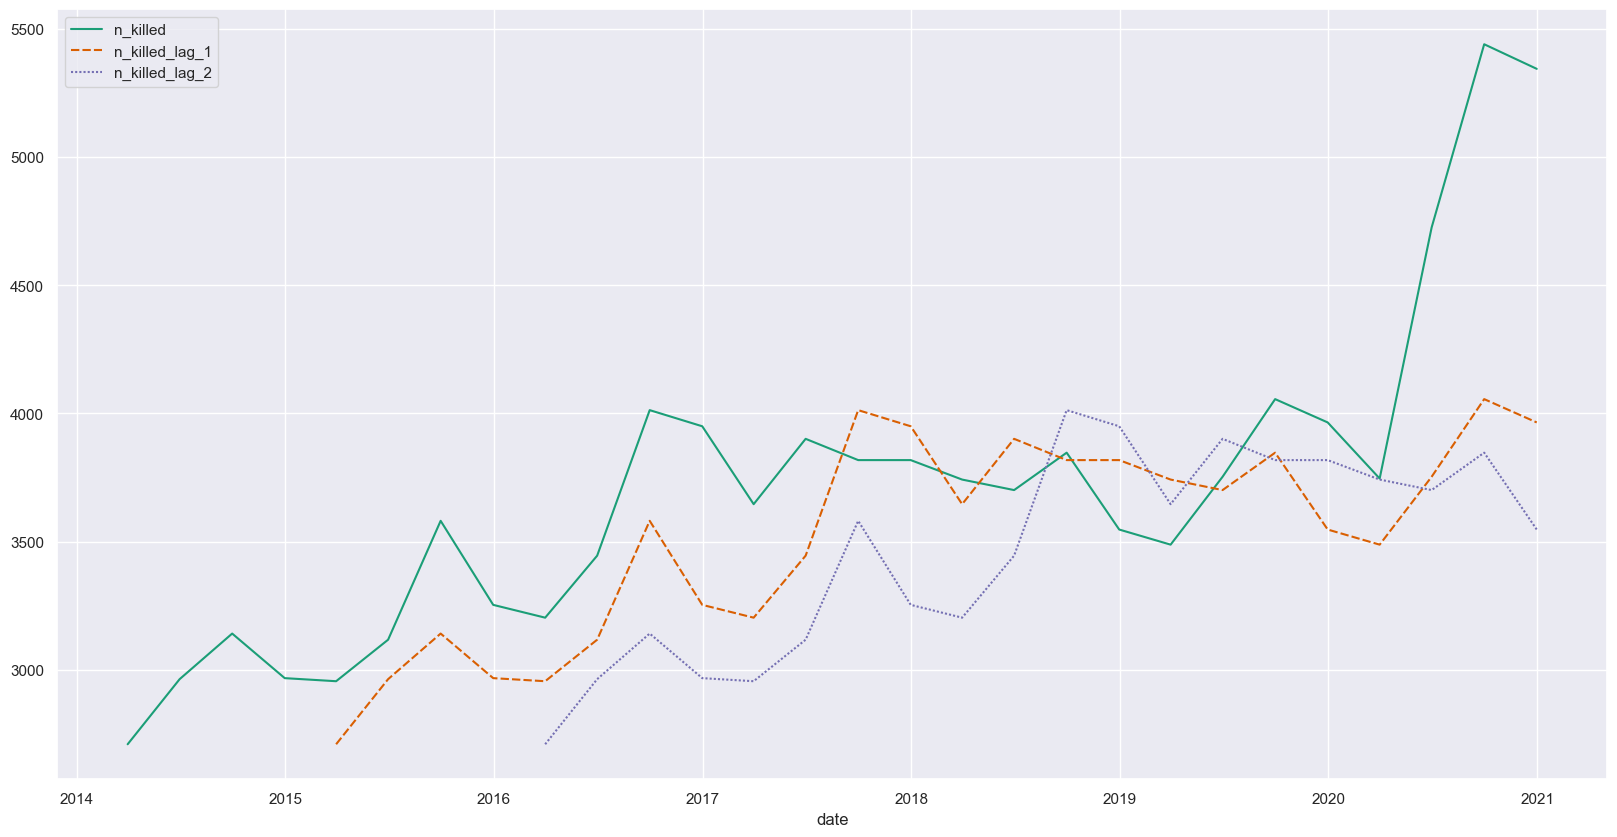

In [48]:
#lineplot for killed and injured
plt.figure(figsize=(20, 10))
stripped = data_quarterly[:'2020']
sns.lineplot(data=stripped[['n_killed', 'n_killed_lag_1', 'n_killed_lag_2']])
plt.show()

Conclusion: If we resample our data quarterly and use our lagged features then we are able to observe a  repeating seasonal pattern of increase in number of killed in the second and third quarter of the year. While the first and fourth quarter of the year almost always record a decrease in numbers.

**Open-source Intelligence**

Identify the most dangerous city in the US.


In [16]:
#https://www.kaggle.com/datasets/louise2001/us-cities?select=uscities.csv
data_cities = pd.read_csv('uscities.csv', usecols=['city', 'state_name', 'lat', 'lng', 'population', 'timezone', 'military'])
data_cities.rename(columns={'state_name': 'state'}, inplace=True)
#creating a new dataset called data_states with aggregated data from the data_cities dataset
data_states = data_cities.groupby('state').agg({'city': 'count',
                                                'population': 'sum',
                                                'military': 'sum'}).reset_index()

In [17]:
#creating a column called involvement in dataset that adds up the number of kills and injuries
dataset['involvement'] = dataset['n_killed'] + dataset['n_injured']

data_by_city = dataset.groupby(['city', 'state']).agg({'n_killed': 'sum', 'n_injured': 'sum', 'incident_id': 'count', 'involvement': 'mean'})
data_by_city.sort_values(by='n_killed', ascending=False, inplace=True)
data_by_city.rename(columns={'incident_id': 'count_incidents'}, inplace=True)

data_by_state = dataset.groupby('state').agg({'n_killed': 'sum', 'n_injured': 'sum', 'incident_id': 'count', 'involvement': 'mean'})
data_by_state.sort_values(by='n_killed', ascending=False, inplace=True)
data_by_state.rename(columns={'incident_id': 'count_incidents'}, inplace=True)

In [18]:
#joining data_cities with data_by_city on city and state
crimes_populations = data_by_city.join(data_cities.set_index(['city', 'state']), how='inner')
crimes_populations.reset_index(inplace=True)

#creating new custom columns
crimes_populations['kills_per_100k'] = crimes_populations['n_killed'] / crimes_populations['population'] * 100000
crimes_populations['injuries_per_100k'] = crimes_populations['n_injured'] / crimes_populations['population'] * 100000
crimes_populations['incidents_per_100k'] = crimes_populations['count_incidents'] / crimes_populations['population'] * 100000
crimes_populations['danger'] = 0.5*crimes_populations['kills_per_100k'] + 0.15* crimes_populations['injuries_per_100k'] + 0.15* crimes_populations['incidents_per_100k'] + 0.2* crimes_populations['involvement']
crimes_populations.sort_values(by='danger', ascending=False, inplace=True)

#filtering it out into different variables with different population ranges
crimes_populations_villages = crimes_populations[crimes_populations['population'] < 100000]
crimes_populations_towns = crimes_populations[(crimes_populations['population'] >= 100000) & (crimes_populations['population'] < 500000)]
crimes_populations_cities = crimes_populations[(crimes_populations['population'] >= 500000) & (crimes_populations['population'] < 1000000)]
crimes_populations_metropolies = crimes_populations[(crimes_populations['population'] >= 1000000)]

crimes_populations

,city,state,n_killed,n_injured,count_incidents,involvement,lat,lng,population,military,timezone,kills_per_100k,injuries_per_100k,incidents_per_100k,danger
7128,Peyton,Colorado,6,2,5,1.600000,39.0330,-104.4904,17,False,America/Denver,35294.117647,11764.705882,29411.764706,23823.849412
8992,Tonopah,Arizona,11,5,13,1.230769,33.4880,-112.9308,59,False,America/Phoenix,18644.067797,8474.576271,22033.898305,13898.551239
3772,Guffey,Colorado,2,1,1,3.000000,38.7591,-105.5024,10,False,America/Denver,20000.000000,10000.000000,10000.000000,13000.600000
4778,La Madera,New Mexico,5,0,1,5.000000,36.3807,-106.0420,25,False,America/Denver,20000.000000,0.000000,4000.000000,10601.000000
2073,Cotopaxi,Colorado,1,1,2,1.000000,38.3739,-105.6911,9,False,America/Denver,11111.111111,11111.111111,22222.222222,10555.755556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,Centennial,Colorado,0,1,1,1.000000,39.5926,-104.8674,110937,False,America/Denver,0.000000,0.901413,0.901413,0.470424
5713,McKinney,Texas,1,0,1,1.000000,33.2015,-96.6669,258277,False,America/Chicago,0.387181,0.000000,0.387181,0.451668
8588,St. Petersburg,Florida,1,0,1,1.000000,27.7931,-82.6652,265351,False,America/New_York,0.376859,0.000000,0.376859,0.444959
7867,Round Lake Beach,Illinois,1,0,1,1.000000,42.3790,-88.0811,279381,False,America/Chicago,0.357934,0.000000,0.357934,0.432657


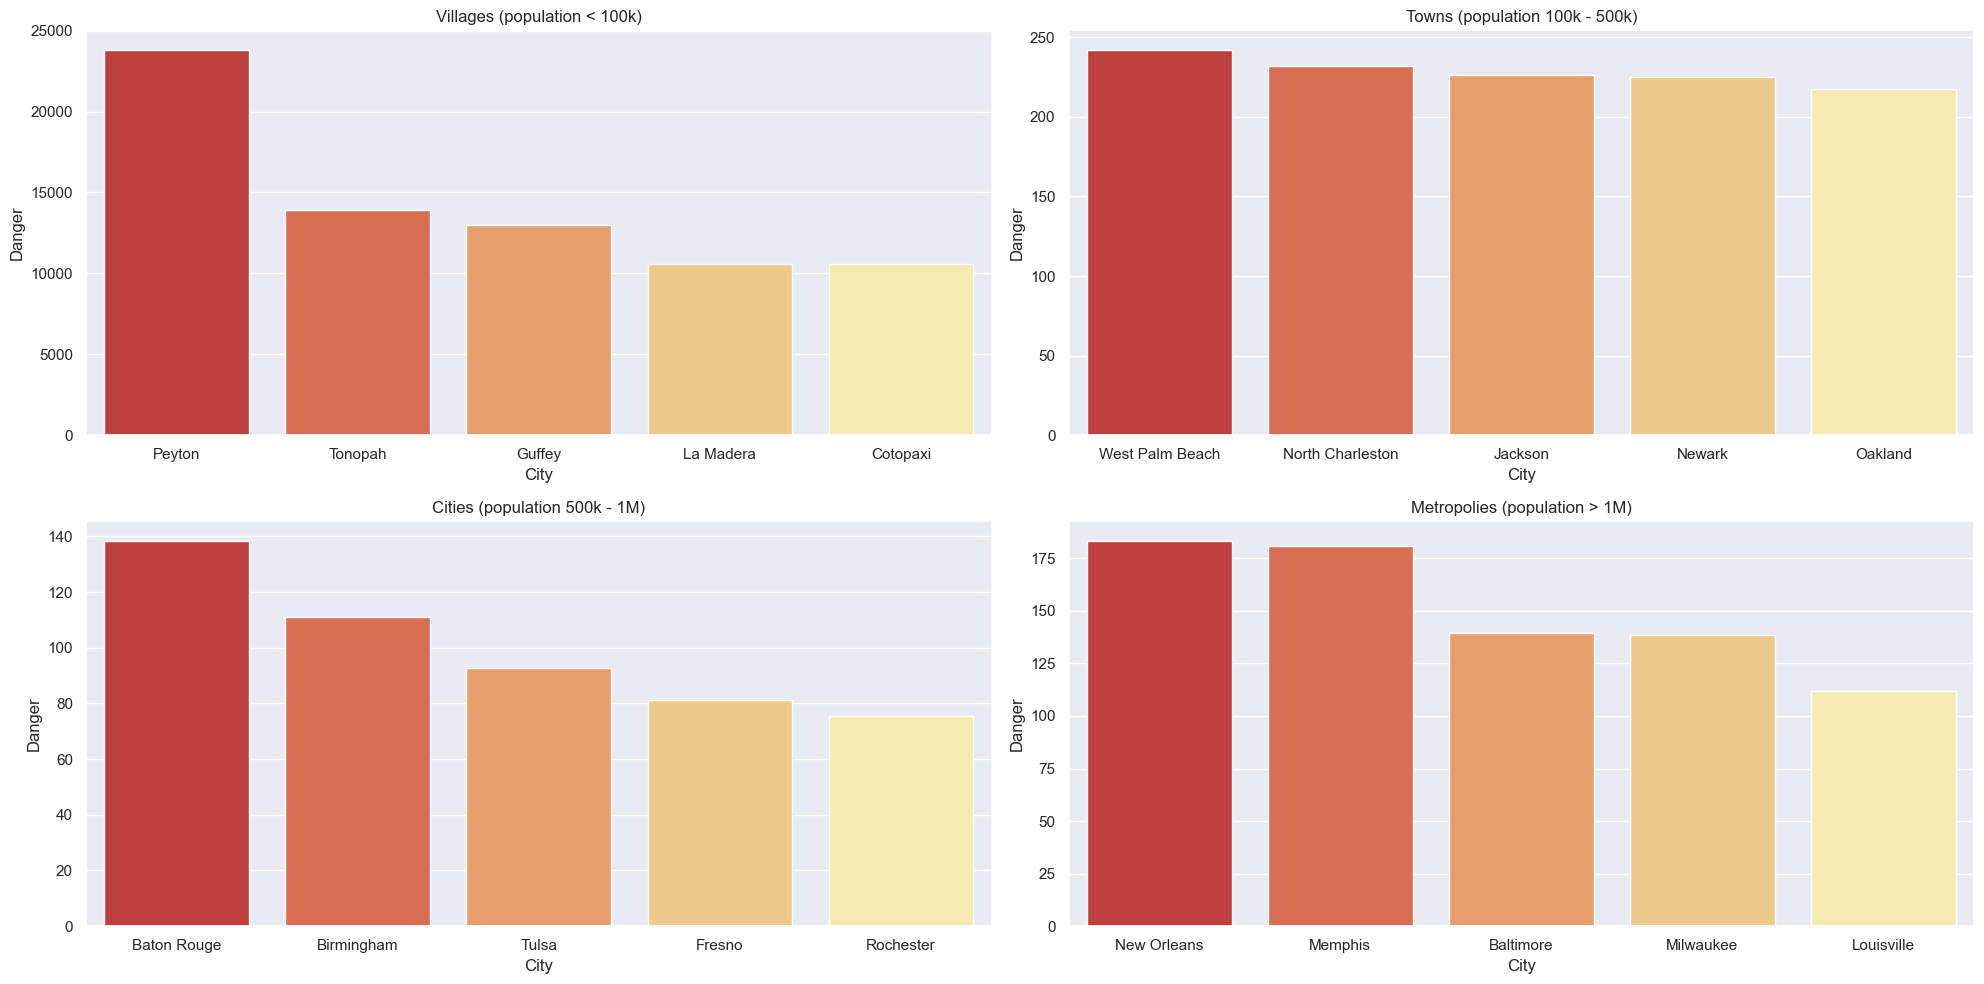

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
#plot the first graph
sns.barplot(x='city', y='danger', data=crimes_populations_villages.head(5), ax=axes[0, 0], palette=palette_changing_top10)
axes[0, 0].set_title('Villages (population < 100k)')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Danger')
#plot the second graph
sns.barplot(x='city', y='danger', data=crimes_populations_towns.head(5), ax=axes[0, 1], palette=palette_changing_top10)
axes[0, 1].set_title('Towns (population 100k - 500k)')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Danger')
#plot the third graph
sns.barplot(x='city', y='danger', data=crimes_populations_cities.head(5), ax=axes[1, 0], palette=palette_changing_top10)
axes[1, 0].set_title('Cities (population 500k - 1M)')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Danger')
#plot the fourth graph
sns.barplot(x='city', y='danger', data=crimes_populations_metropolies.head(5), ax=axes[1, 1], palette=palette_changing_top10)
axes[1, 1].set_title('Metropolies (population > 1M)')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Danger')
plt.tight_layout()
plt.show()

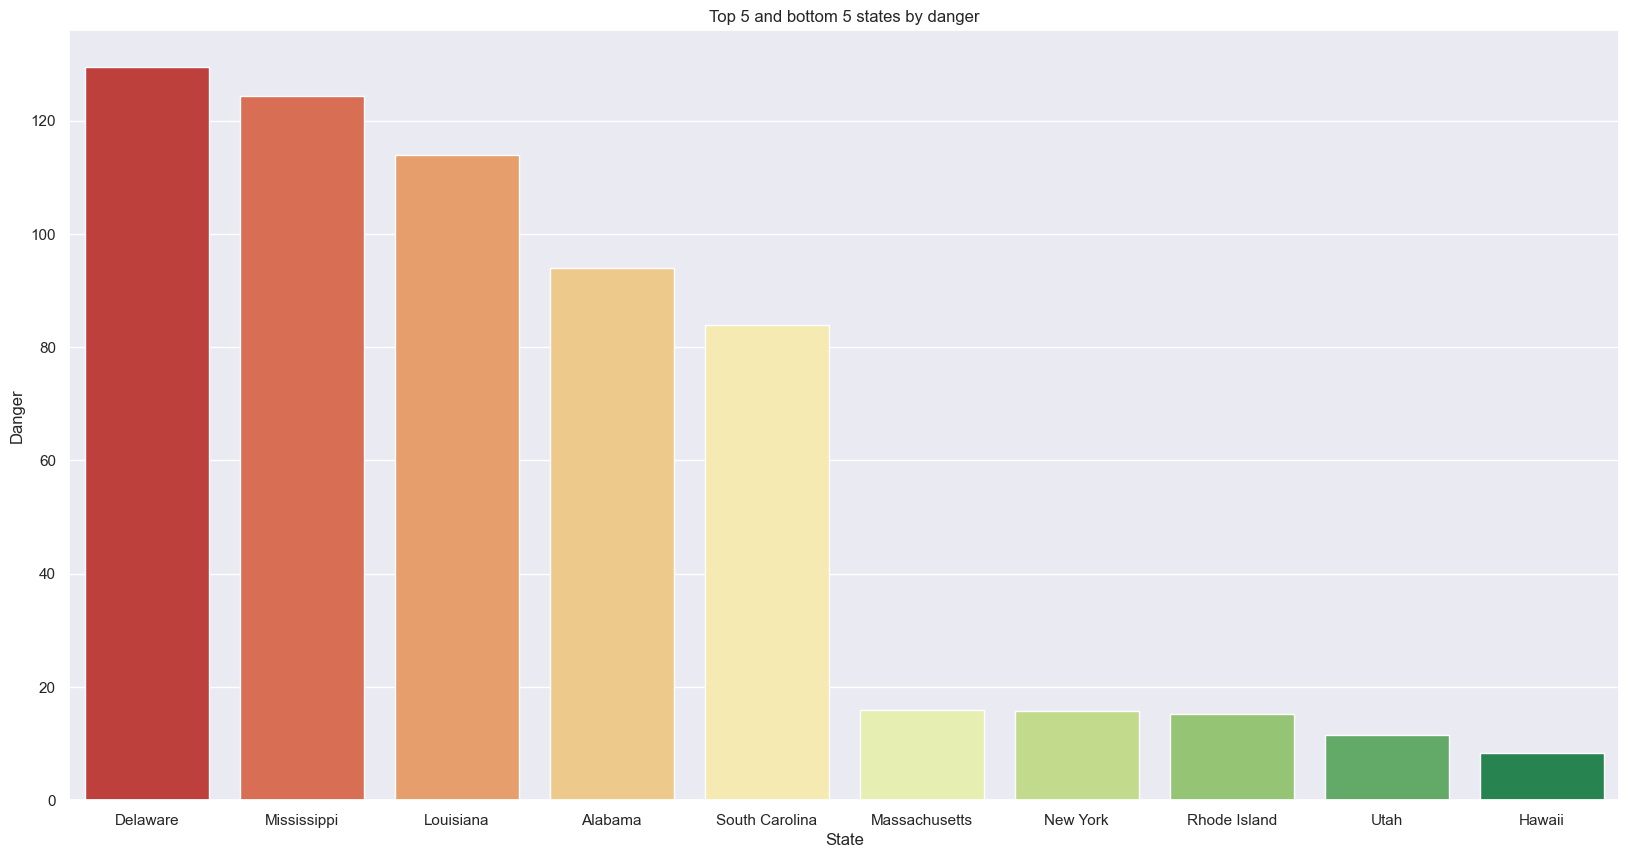

In [20]:
#do the same for states as well using data_by_state and data_states
crimes_populations_states = data_by_state.join(data_states.set_index('state'), how='inner')
crimes_populations_states.reset_index(inplace=True)
crimes_populations_states['kills_per_100k'] = crimes_populations_states['n_killed'] / crimes_populations_states['population'] * 100000
crimes_populations_states['injuries_per_100k'] = crimes_populations_states['n_injured'] / crimes_populations_states['population'] * 100000
crimes_populations_states['incidents_per_100k'] = crimes_populations_states['count_incidents'] / crimes_populations_states['population'] * 100000
crimes_populations_states['danger'] = 0.5*crimes_populations_states['kills_per_100k'] + 0.15* crimes_populations_states['injuries_per_100k'] + 0.15* crimes_populations_states['incidents_per_100k'] + 0.2* crimes_populations['involvement']
crimes_populations_states.sort_values(by='danger', ascending=False, inplace=True)

top_bottom_states = pd.concat([crimes_populations_states.head(5), crimes_populations_states.tail(5)])

#plot the states top 5 and low 5 states by danger in the same barplot, there should be 10 states in total, do not stack it one on top of the other
plt.figure(figsize=(20, 10))
sns.barplot(x='state', y='danger', data=top_bottom_states, palette=palette_changing_top10)
plt.xlabel('State')
plt.ylabel('Danger')
plt.title('Top 5 and bottom 5 states by danger')
plt.show()

#checking if self-created metric was correct here: https://worldpopulationreview.com/state-rankings/most-dangerous-states

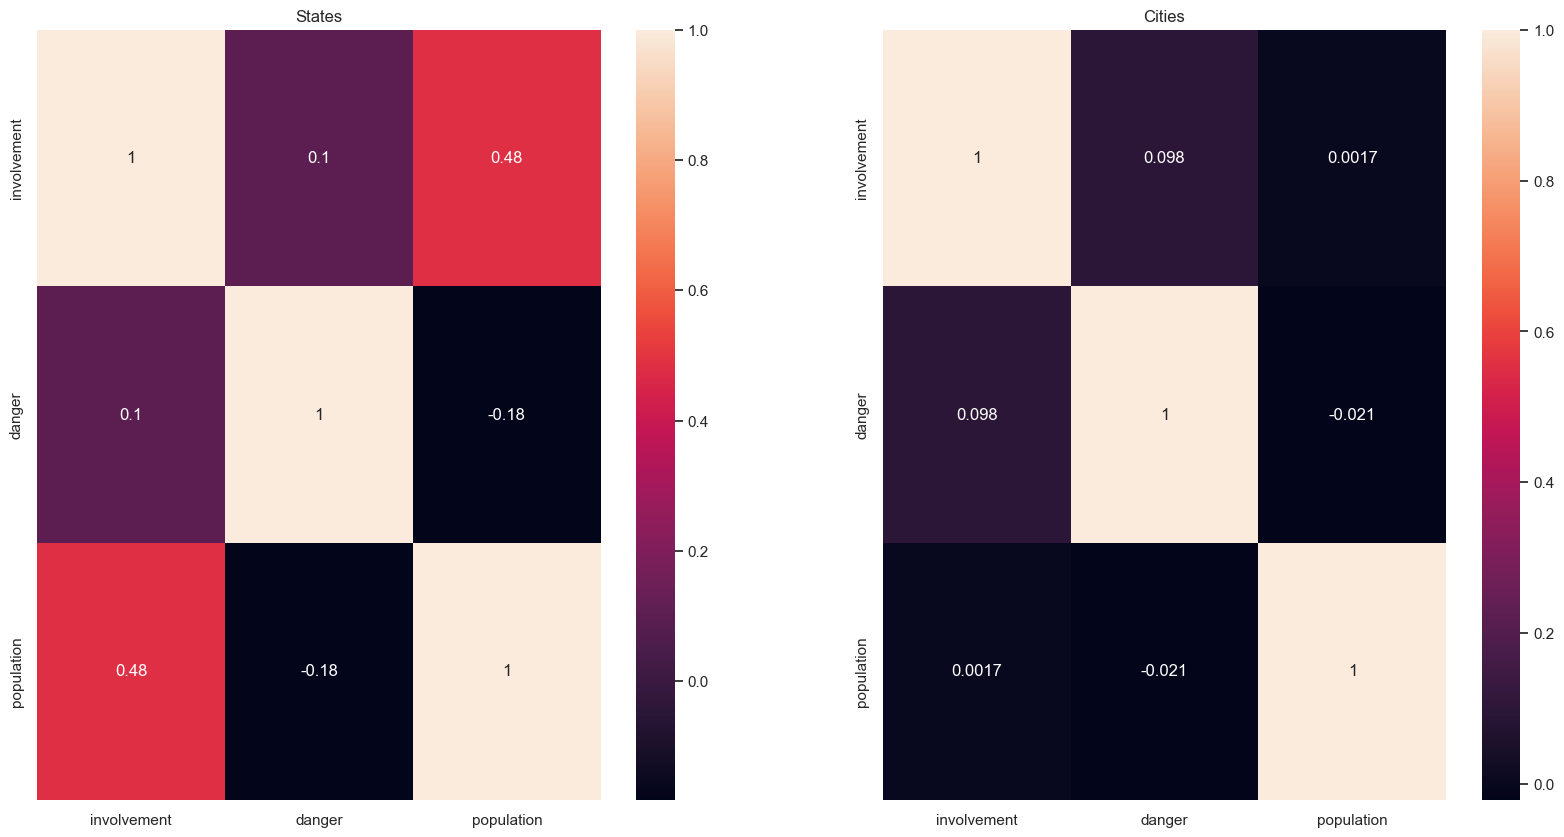

In [21]:
#create a new variable involvement which would be the average of killed and injured per incident per state and per city
crimes_populations_states['involvement'] = (crimes_populations_states['n_killed'] + crimes_populations_states['n_injured']) / crimes_populations_states['count_incidents']
crimes_populations['involvement'] = (crimes_populations['n_killed'] + crimes_populations['n_injured']) / crimes_populations['count_incidents']

#heatmaps for cities and states between involvement, danger and population
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(crimes_populations_states[['involvement', 'danger', 'population']].corr(), annot=True, ax=axes[0])
axes[0].set_title('States')
sns.heatmap(crimes_populations[['involvement', 'danger', 'population']].corr(), annot=True, ax=axes[1])
axes[1].set_title('Cities')
plt.show()

In [40]:
#https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities

#load dataset houses comprising various variables around housing and demographics 
#for the top 50 American cities by population
datasethouses = pd.read_csv('houses.csv')
datasethouses['pricepersqft'] = datasethouses['Price'] / datasethouses['Living Space']
datasethouses_grouped = datasethouses.groupby(['State', 'City']).agg({'pricepersqft': 'mean',
                                                            'Price': 'mean',
                                                            'Median Household Income': 'mean',
                                                            'Living Space': 'count'})
datasethouses_grouped.reset_index(inplace=True)
datasethouses_grouped.columns = [col.lower() for col in datasethouses_grouped.columns]
datasethouses_grouped

,state,city,pricepersqft,price,median household income,living space
0,Arizona,Apache Junction,254.803612,4.417288e+05,68960.000000,13
1,Arizona,Cave Creek,329.774530,7.523329e+05,152656.000000,17
2,Arizona,Glendale,311.959301,6.496075e+05,122407.250000,24
3,Arizona,Laveen,221.806779,4.889998e+05,119550.000000,44
4,Arizona,Mesa,255.878718,4.881791e+05,102365.366890,894
...,...,...,...,...,...,...
242,Virginia,Virginia Beach,259.835604,5.685046e+05,119183.083805,883
243,Washington,Seattle,609.728353,1.011134e+06,161828.874419,860
244,Wisconsin,Greendale,231.404321,2.999000e+05,104722.000000,1
245,Wisconsin,Milwaukee,152.607710,2.265784e+05,69318.728083,673


In [41]:
#joining imported and grouped houses data with custom crimes_populations

data_merged = pd.merge(datasethouses_grouped, crimes_populations, on=['city', 'state'], how='inner')
data_merged.sort_values(by='population', ascending=False, inplace=True)
data_merged

,state,city,pricepersqft,price,median household income,living space,n_killed,n_injured,count_incidents,involvement,lat,lng,population,military,timezone,kills_per_100k,injuries_per_100k,incidents_per_100k,danger
87,New York,New York,1247.583018,1.435883e+06,206957.000000,18,0,10,6,1.666667,40.6943,-73.9249,18713220,False,America/New_York,0.000000,0.053438,0.032063,0.346158
25,California,Los Angeles,784.428707,1.838176e+06,121054.532220,419,1273,1367,1960,1.346939,34.1139,-118.4068,12750807,False,America/Los_Angeles,9.983682,10.720890,15.371576,9.175099
51,Illinois,Chicago,271.611110,5.045667e+05,118323.037607,585,4694,22537,21723,1.253556,41.8373,-87.6862,8604203,False,America/Chicago,54.554733,261.930129,252.469636,104.688043
48,Florida,Miami,733.254102,1.375088e+06,116255.548831,727,615,1211,1218,1.499179,25.7839,-80.2102,6445545,False,America/New_York,9.541474,18.788171,18.896773,10.723314
129,Texas,Dallas,302.642520,8.204332e+05,124358.076301,865,1242,1330,1951,1.318298,32.7936,-96.7662,5743938,False,America/Chicago,21.622796,23.154846,33.966244,19.643221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Texas,Manchaca,220.299501,6.174995e+05,140044.000000,2,1,0,1,1.000000,30.1353,-97.8362,1254,False,America/Chicago,79.744817,0.000000,79.744817,52.034131
126,Texas,Clint,55.272109,1.300000e+05,57651.000000,1,2,0,1,2.000000,31.5901,-106.2289,1112,False,America/Denver,179.856115,0.000000,89.928058,103.817266
39,Colorado,Calhan,261.955938,9.750000e+05,85251.000000,1,0,1,1,1.000000,39.0345,-104.2994,834,False,America/Denver,0.000000,119.904077,119.904077,36.171223
19,California,Friant,308.976534,6.445100e+05,168098.000000,3,0,2,1,2.000000,36.9848,-119.7130,604,False,America/Los_Angeles,0.000000,331.125828,165.562914,74.903311


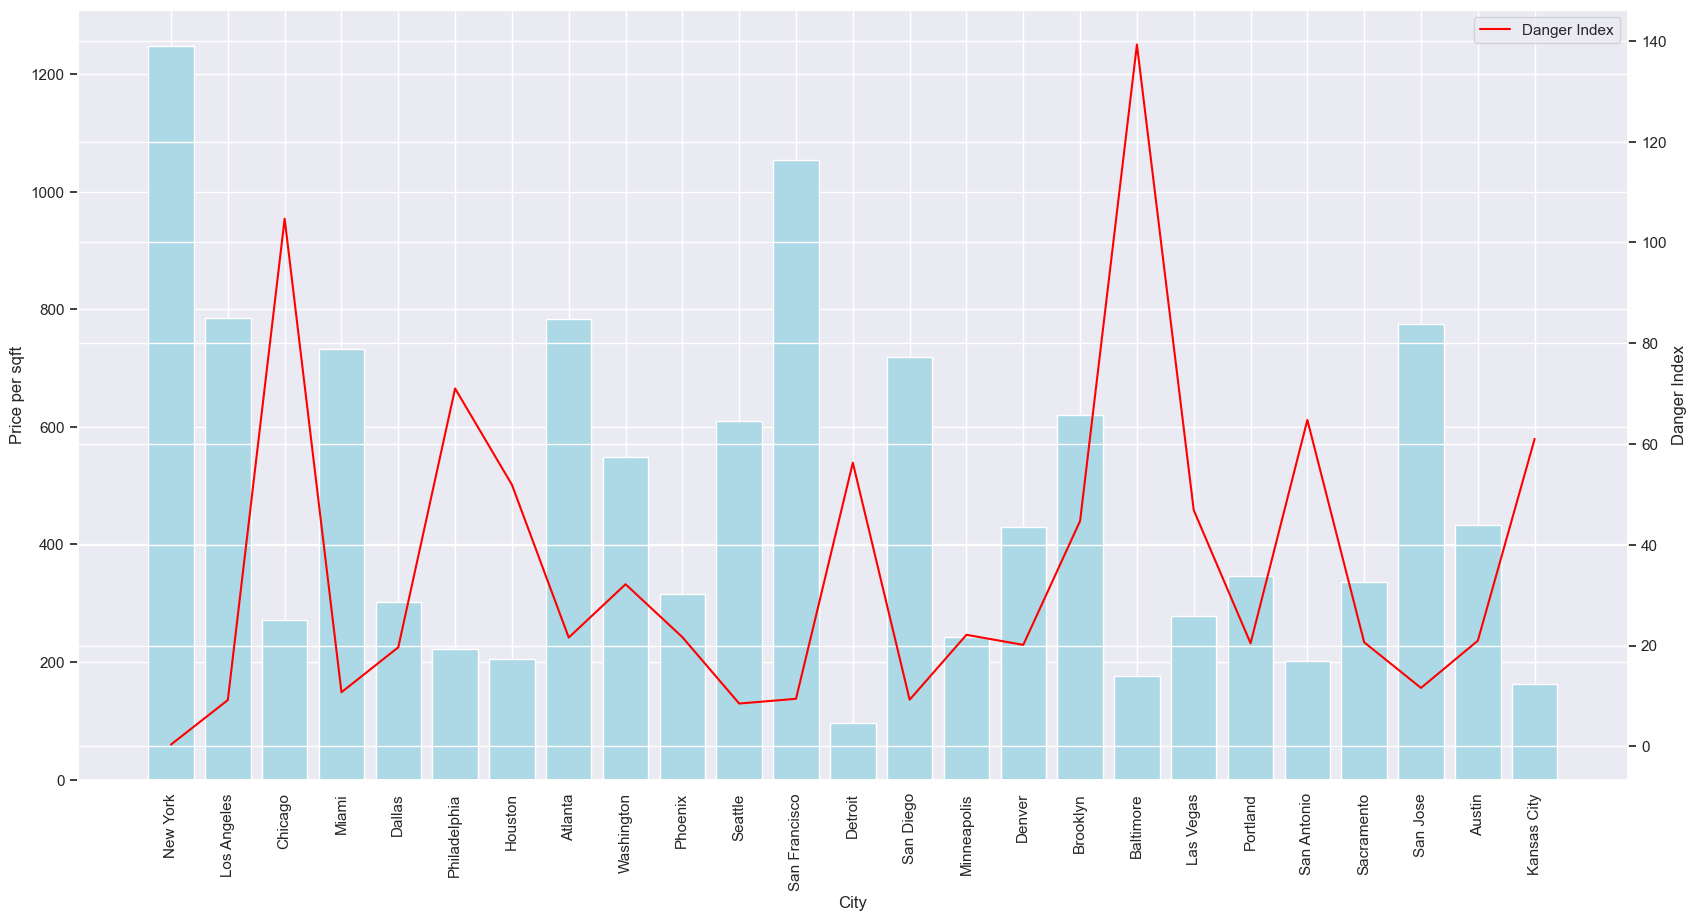

In [42]:
#ploting danger index and calculated variable 'pricpersqft' inside one figure

plt.figure(figsize=(20, 10))
plt.bar(data_merged['city'].head(25), data_merged['pricepersqft'].head(25), color='lightblue', label='Price per sqft')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Price per sqft')
plt.twinx()
plt.plot(data_merged['city'].head(25), data_merged['danger'].head(25), color='red', label='Danger Index')
plt.ylabel('Danger Index')
plt.legend()
plt.show()


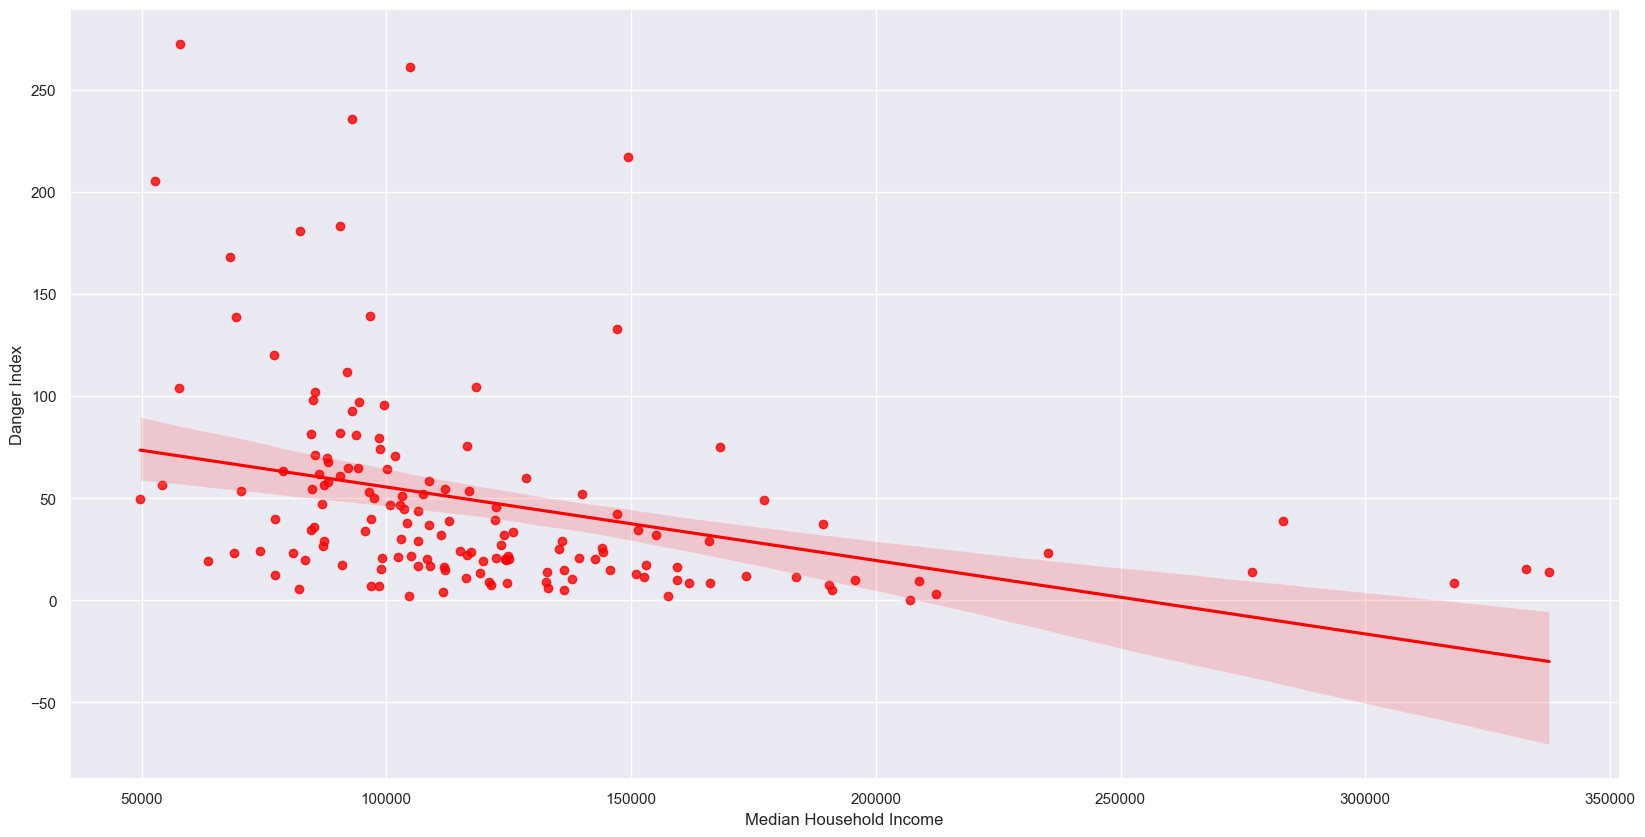

In [43]:
#making a regression plot between household income and danger index
plt.figure(figsize=(20, 10))
sns.regplot(x='median household income', y='danger', data=data_merged, color='red')
plt.xlabel('Median Household Income')
plt.ylabel('Danger Index')
plt.show()

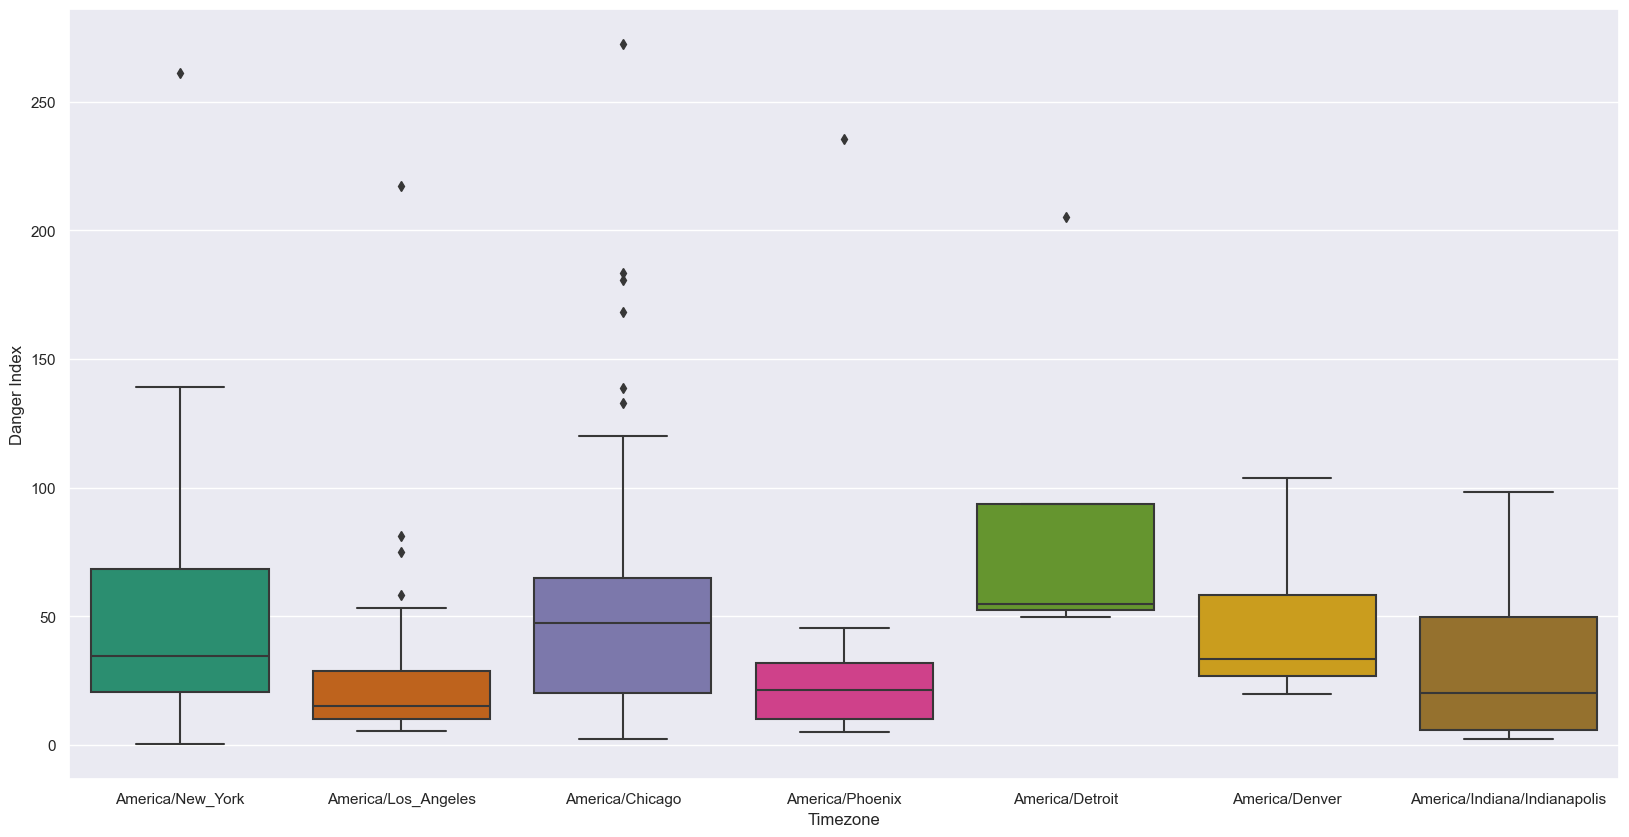

In [44]:
#making a plot that shows the relation between timezone and danger index
plt.figure(figsize=(20, 10))
sns.boxplot(x='timezone', y='danger', data=data_merged)
plt.xlabel('Timezone')
plt.ylabel('Danger Index')
plt.show()

**MAPS**

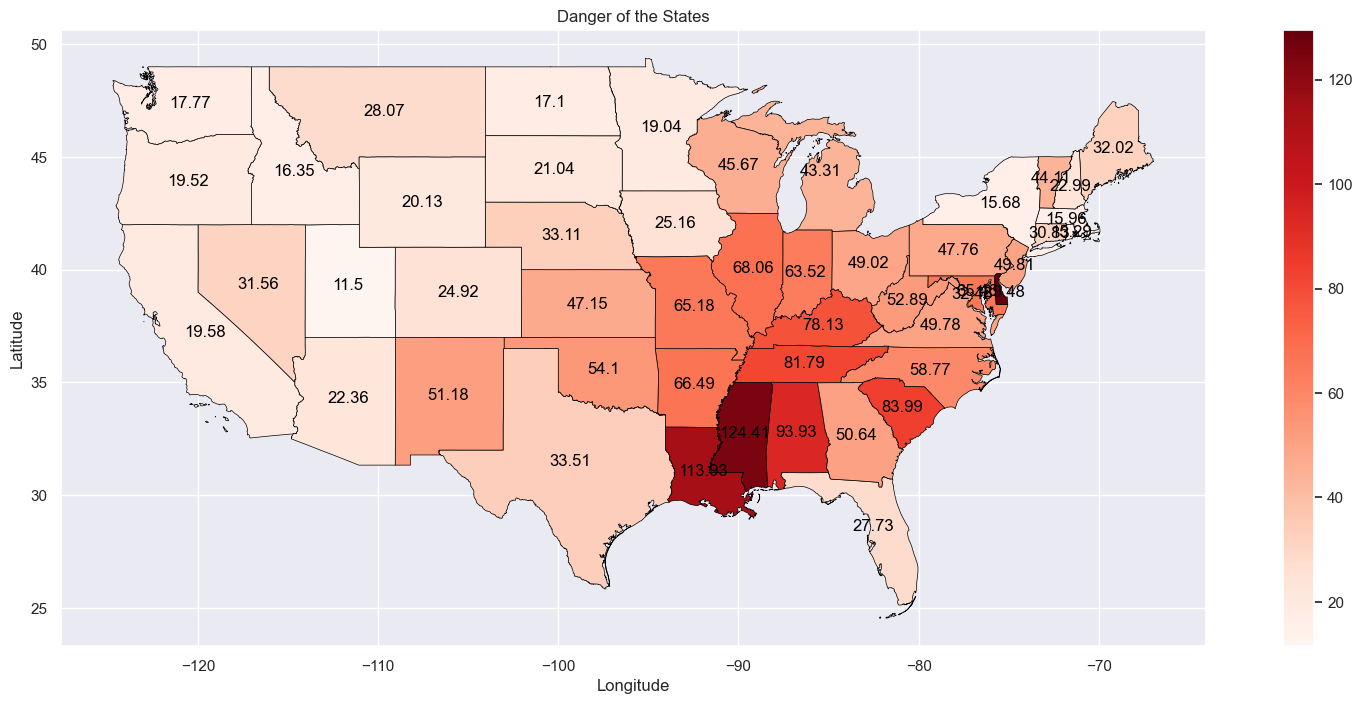

In [23]:
# Load GeoJSON file with U.S. state boundaries
us_states = gpd.read_file("geojson.json")

# join dataset with our 'crimes_populations_states' table
us_states = us_states.merge(crimes_populations_states[['state', 'danger']], left_on='NAME', right_on='state')
us_states = us_states.merge(data_by_state, left_on='NAME', right_on='state')
us_states = us_states[(us_states['NAME'] != 'Alaska') & (us_states['NAME'] != 'Hawaii')]

# plot danger index of all the states on map of USA
ax = us_states.plot(column='danger', cmap='Reds', edgecolor='black', linewidth=0.5, figsize=(20, 8), legend=True)

for x, y, danger in zip(us_states.geometry.centroid.x, us_states.geometry.centroid.y, us_states['danger']):
    ax.text(x, y, f'{round(danger, 2):,}', fontsize=12, ha='center', va='center', color='black')


plt.title("Danger of the States")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

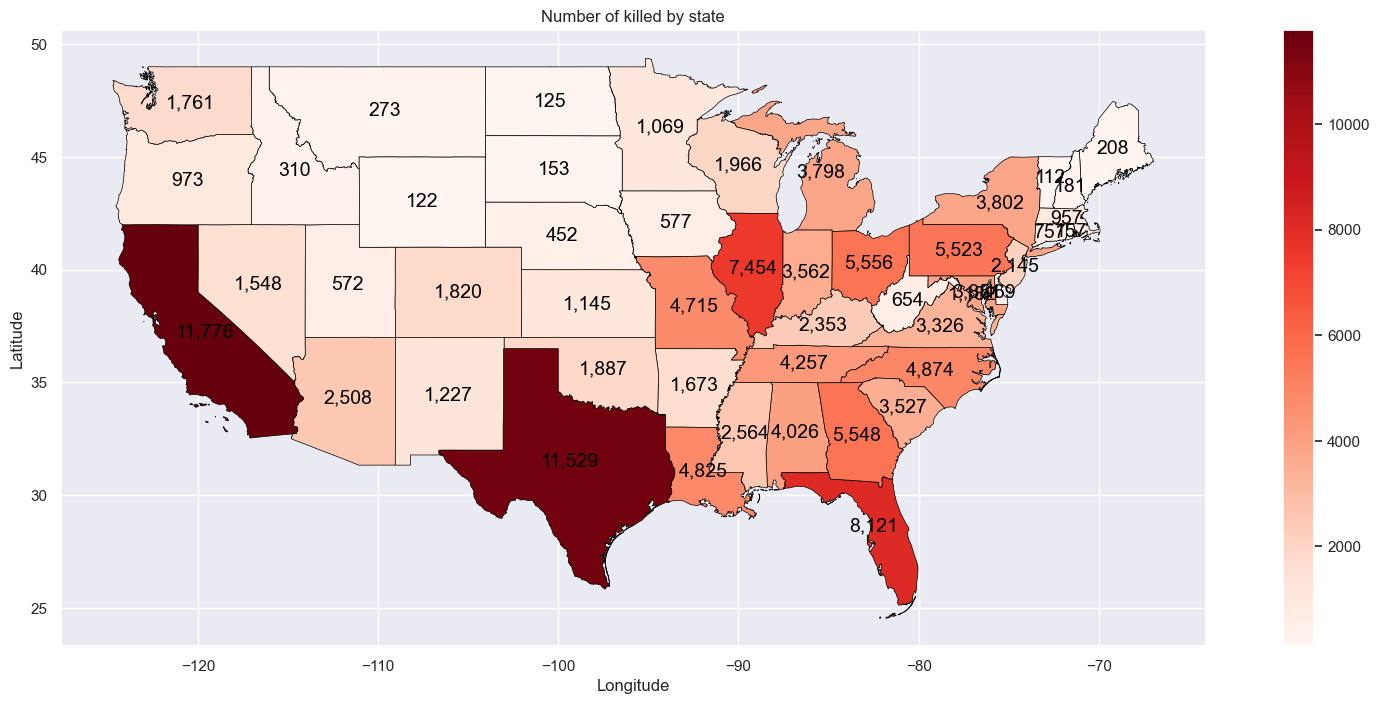

In [24]:
us_states = gpd.read_file("geojson.json")
us_states = us_states.merge(data_by_state, left_on='NAME', right_on='state')
us_states = us_states[(us_states['NAME'] != 'Alaska') & (us_states['NAME'] != 'Hawaii')]

# plot the amount of killed people by state on map of USA

ax = us_states.plot(column='n_killed', cmap='Reds', edgecolor='black', linewidth=0.5, figsize=(20, 8), legend=True)
for x, y, killed, injured in zip(us_states.geometry.centroid.x, us_states.geometry.centroid.y, us_states['n_killed'], us_states['n_injured']):
    ax.text(x, y, f'{killed:,}', fontsize=14, ha='center', va='center', color='black')

plt.title("Number of killed by state")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [25]:
#making function that creates geometry points out of available addresses
def geolocator(address, city, state):
    location = gpd.tools.geocode(f'{address}, {city}, {state}')
    return location.geometry.iloc[0]

In [26]:
#examine which incident turned out to be a mass murder
mass_murders = dataset[dataset['n_killed'] > 8]
#geolocation adresses where these mass murders happened
mass_murders['geometry'] = mass_murders.apply(lambda x: geolocator(x['address'], x['city'], x['state']), axis=1)
mass_murders

,incident_id,state,city,address,n_killed,n_injured,involvement,geometry
date,,,,,,,,
2022-05-24,2310278,Texas,Uvalde,715 Old Carrizo Rd,22,17,39,POINT (-99.78900162091455 29.1988371)
2022-05-14,2301751,New York,Buffalo,1275 Jefferson Ave,10,3,13,POINT (-78.85262215556568 42.90985275)
2021-05-26,2015730,California,San Jose,101 W Younger Ave,10,0,10,POINT (-121.90905395066913 37.3544754)
2021-04-15,1978635,Indiana,Indianapolis,8951 Mirabel Rd,9,7,16,POINT (-86.3223538 39.6812364)
2021-03-22,1958652,Colorado,Boulder,3600 Table Mesa Dr,10,1,11,POINT (-105.25140814076637 39.983456000000004)
2019-08-04,1467828,Ohio,Dayton,419 E 5th St,10,17,27,POINT (-84.1844036 39.7572779)
2019-08-03,1466705,Texas,El Paso,7101 Gateway Blvd,23,23,46,POINT (-106.38448834388183 31.777254399999997)
2019-05-31,1410442,Virginia,Virginia Beach,2405 Courthouse Drive,13,4,17,POINT (-76.05747685 36.7509517)
2018-11-07,1249561,California,Thousand Oaks,99 Rolling Oaks Dr,13,2,15,POINT (-118.8749045302296 34.1765708)


In [27]:
data_states

,state,city,population,military
0,Alabama,581,4392298,2
1,Alaska,326,739126,3
2,Arizona,427,9953669,0
3,Arkansas,536,2665795,0
4,California,1470,59652083,10
5,Colorado,448,7734597,2
6,Connecticut,110,4074019,1
7,Delaware,77,565804,1
8,District of Columbia,1,5379184,0
9,Florida,911,31031088,4


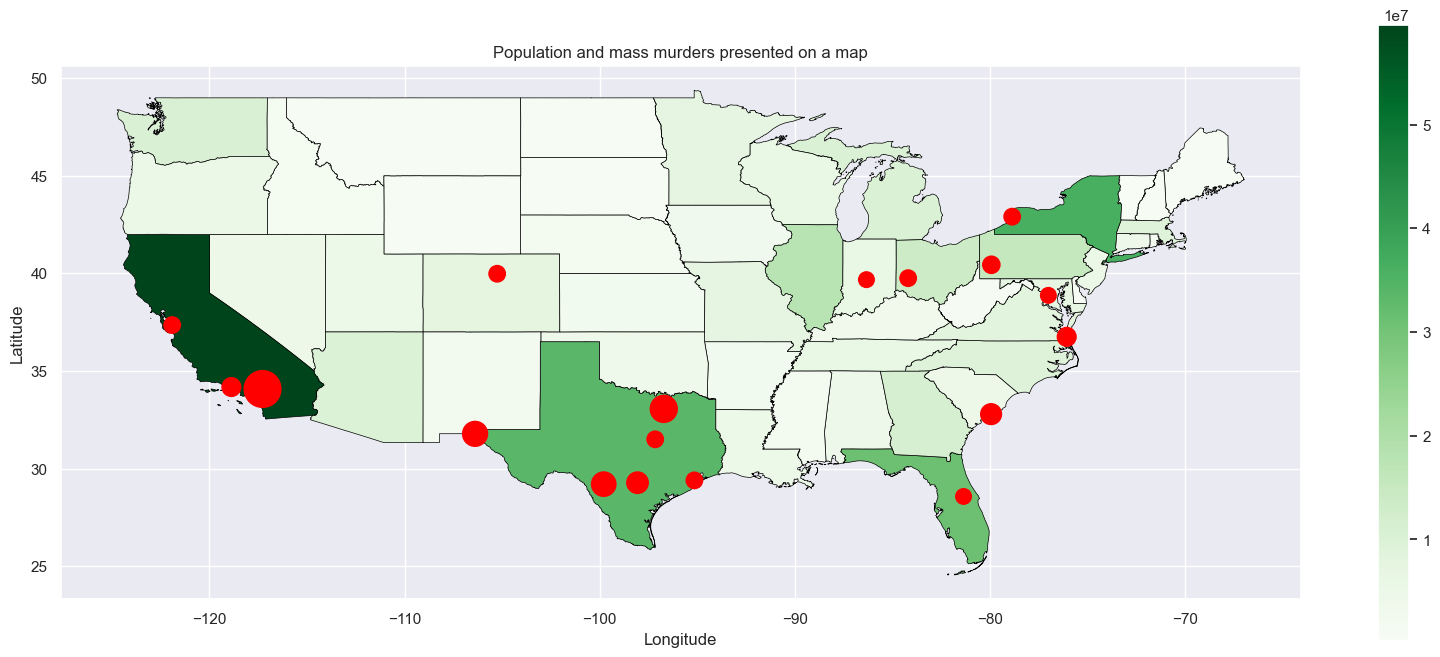

In [28]:
#Ploting locations of mass murders with respect to the number of people killed on map of USA

us_states = us_states.merge(data_states, left_on='NAME', right_on='state')

#excluding alaska and hawaii and puerto rico
us_states = us_states[(us_states['NAME'] != 'Alaska') & (us_states['NAME'] != 'Hawaii') & (us_states['NAME'] != 'Puerto Rico')]

ax = us_states.plot(column='population', cmap='Greens', edgecolor='black',  linewidth=0.5, figsize=(20, 8), legend=True)

mass_murders = gpd.GeoDataFrame(mass_murders, geometry='geometry')
mass_murders.plot(ax=ax, color='red', markersize=mass_murders['n_killed'] * 14)

plt.title("Population and mass murders presented on a map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()